TP 3 : Plongements lexicaux et réécriture de textes
====

1 - Introduction 
------

Dans ce TP, nous aborderons les plongements lexicaux à travers la bibliothèque Gensim et nous verrons comment réécrire des textes dans le cadre du projet d'écriture créative OULIPO (https://fr.wikipedia.org/wiki/Oulipo).

N'hésitez pas à regarder régulièrement la documentation des librairies, des exemples d\'utilisation accompagnent généralement l\'explication de chaque fonction.

- Gensim : https://radimrehurek.com/gensim/apiref.html
- Scikit-learn : https://scikit-learn.org/stable/


Installation des librairies si nécessaire.

In [1]:
pip install --upgrade gensim
#!pip install --upgrade scikit-learn

Import des librairies.

In [1]:
import gensim
from gensim import corpora
import gensim.downloader as api
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.decomposition import IncrementalPCA
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
import numpy as np
from nltk.corpus import stopwords
import nltk
from pprint import pprint

Charger un modèle du langage. Attention les modèles peuvent être assez lourds et leur chargement peut prendre un certain temps. Tous les modèles sont accessibles [ICI](https://github.com/RaRe-Technologies/gensim-data). 

In [2]:
# pour GloVe
wv = api.load('glove-wiki-gigaword-300')

# pour FastText
# wv = api.load('fasttext-wiki-news-subwords-300')

# pour ConceptNet Numberbatch
# wv = api.load('conceptnet-numberbatch-17-06-300')

# pour Word2vec
# wv = api.load('word2vec-google-news-300')

[==================================================] 100.0% 376.1/376.1MB downloaded


2 - Analyser les plongements lexicaux 
------

Identifier la taille du plongement. Le nombre de lignes correspond au nombre de mots répertoriés dans le plogement et le nombre de colonnnes correspond au nombre de dimensions latentes de la représentation vectorielle.

In [3]:
wv.vectors.shape

(400000, 300)

Accéder au vecteur d'un mot donné.

In [5]:
wv['cat'].shape
print(wv['cat'])

[-0.29353    0.33247   -0.047372  -0.12247    0.071956  -0.23408
 -0.06238   -0.0037192 -0.39462   -0.69411    0.36731   -0.12141
 -0.044485  -0.15268    0.34864    0.22926    0.54361    0.25215
  0.097972  -0.087305   0.87058   -0.12211   -0.079825   0.28712
 -0.68563   -0.27265    0.22056   -0.75752    0.56293    0.091377
 -0.71004   -0.3142    -0.56826   -0.26684   -0.60102    0.26959
 -0.17992    0.10701   -0.57858    0.38161   -0.67127    0.10927
  0.079426   0.022372  -0.081147   0.011182   0.67089   -0.19094
 -0.33676   -0.48471   -0.35406   -0.15209    0.44503    0.46385
  0.38409    0.045081  -0.59079    0.21763    0.38576   -0.44567
  0.009332   0.442      0.097062   0.38005   -0.11881   -0.42718
 -0.31005   -0.025058   0.12689   -0.13468    0.11976    0.76253
  0.2524    -0.26934    0.068629  -0.10071    0.011066  -0.18532
  0.44983   -0.57507    0.12278   -0.064878   0.044456  -0.020999
 -0.069838  -0.47329   -0.43074    0.39158   -0.047815  -0.93659
 -0.55128   -0.1422    

Calculer la similarité cosinus entre deux mots à partir des représentations vectorielles.

In [6]:
from numpy.linalg import norm
def cosine_similarity(A, B):
    return np.dot(A,B)/(norm(A)*norm(B))
cosine_similarity(wv['cat'], wv['dog'])

0.6816746

[Q1] Définir la distance euclidienne entre deux mots à partir des représentations vectorielles.

In [8]:
# définir la distance euclidienne entre le mot "cat" et le mot "dog" a partir des representations vectorielles
def euclidean_distance(A, B):
    return np.linalg.norm(A-B)
print(euclidean_distance(wv['cat'], wv['dog']))
print("Je devais trouver  5.1959047")

5.1959047
Je devais trouver  5.1959047


[Q2] Trouver la méthode qui implémente le cosinus dans Gensim, et montrer les résultats pour les paires de mots suivantes: (football, soccer), (football, elephant), (good, bad), (black, white), (yesterday,tomorrow). Quelles sont vos remarques?

In [11]:
"""
[Q2] Trouver la méthode qui implémente le cosinus dans Gensim, et montrer les résultats pour les paires de mots suivantes: 
(football, soccer), (football, elephant), (good, bad), (black, white), (yesterday,tomorrow). Quelles sont vos remarques?
"""
print("'football' 'soccer'",wv.similarity('football', 'soccer'))
print("'football' 'elephant'",wv.similarity('football', 'elephant'))
print("'good' 'bad'",wv.similarity('good', 'bad'))
print("'yesterday' 'tomorrow'",wv.similarity('yesterday', 'tomorrow'))
print("'black' 'white'",wv.similarity('black', 'white'))
# On constate que les mots football et elephant n'ont pas de similarité au vu de leur score de 0.01 de similarité


'football' 'soccer' 0.76825917
'football' 'elephant' 0.0144579625
'good' 'bad' 0.64452195
'yesterday' 'tomorrow' 0.56826925
'black' 'white' 0.7135821


In [8]:
# insérer votre code ici

'football'	'soccer'	0.77
'football'	'elephant'	0.01
'good'	'bad'	0.64
'yesterday'	'tomorrow'	0.57
'black'	'white'	0.71


[Q3] Comment relier la fonction wv.distance() à la fonction wv.similarity()?

In [13]:
# [Q3] Comment relier la fonction wv.distance() à la fonction wv.similarity()?
def similarity_to_distance(similarity):
    return np.sqrt(2 * (1 - similarity))

# Exemple d'utilisation avec Gensim
# Remplacer 'word1' et 'word2' par les mots de votre choix
word1 = 'football'
word2 = 'soccer'

similarity = wv.similarity(word1, word2)
distance = similarity_to_distance(similarity)

print(f"Similarité cosinus entre '{word1}' et '{word2}': {similarity}")
print(f"Distance convertie à partir de la similarité cosinus: {distance}")

Similarité cosinus entre 'football' et 'soccer': 0.7682591676712036
Distance convertie à partir de la similarité cosinus: 0.6807948770794274


dans Gensim, les fonctions wv.distance() et wv.similarity() sont directement liées, mais de manière inverse. Autrement dit, **si deux mots sont très similaires (c'est-à-dire qu'ils ont une similarité cosinus élevée), leur distance calculée par wv.distance() sera faible**, **et inversement**. Cette relation inverse est vraie car la similarité cosinus mesure à quel point deux vecteurs sont proches en termes d'angle, tandis que la distance (souvent euclidienne) mesure leur éloignement linéaire.

En résumé, "true" indique que ces deux fonctions sont complémentaires pour évaluer la relation entre les représentations vectorielles de mots dans Gensim.

In [9]:
# insérer votre code ici

True

Trouver les K plus proches voisins d'un mot dans le plongement lexical.

In [22]:
K=10
wv.most_similar(positive=['logan'], topn=K)

[('airport', 0.48225298523902893),
 ("o'hare", 0.41365137696266174),
 ('henderson', 0.4047490358352661),
 ('boone', 0.4017186760902405),
 ('newark', 0.39909273386001587),
 ('shannon', 0.398743212223053),
 ('dawson', 0.3980349004268646),
 ('hartsfield', 0.3888028860092163),
 ('smith', 0.38434872031211853),
 ('lerman', 0.38237932324409485)]

In [10]:
K=5
wv.most_similar(positive=['cup'], topn=K)

[('cups', 0.6957380175590515),
 ('champions', 0.6520988941192627),
 ('finals', 0.6479452252388),
 ('tournament', 0.6046193838119507),
 ('championship', 0.6013891696929932)]

[Q4] Ecrire la fonction qui calcule les K plus proches voisins d'un mot de référence sans recourir à la méthode wv.most_similar(). Vous devrez calculer le cosinus du mot de référence avec tous les mots du modèle qui se trouvent dans wv.vectors.

In [27]:
# insérer votre code ici
from sklearn.metrics.pairwise import cosine_similarity

def find_closest_words(word, embeddings, topn=5):
    word_vector = embeddings[word].reshape(1, -1)
    all_words = embeddings.index_to_key
    similarities = []

    for other_word in all_words:
        other_word_vector = embeddings[other_word].reshape(1, -1)
        sim = cosine_similarity(word_vector, other_word_vector)
        similarities.append((other_word, sim[0][0]))

    similarities.sort(key=lambda x: x[1], reverse=True)
    closest_words = [word for word, similarity in similarities[1:topn+1]]  # Skip the first one as it is the word itself

    return closest_words

# Utilisez cette fonction pour trouver les mots les plus proches
K = 5
closest_words = find_closest_words('dog', wv, topn=K)
print(closest_words)



['dogs', 'cat', 'pet', 'puppy', 'hound']


dog [0.6816747]
cats [0.68158376]
pet [0.5870365]
dogs [0.5407668]
feline [0.4897971]


Trouver l'inconnu. Etant donnée une liste de mots, la méthode wv.doesnt_match() trouve le mot le moins similaire à tous les autres dans la liste.

In [28]:
wv.doesnt_match(['cat', 'dog', 'mouse', 'airplane', 'bird', 'turtle'])

'airplane'

3 - Comprendre l'analogie dans les plongements lexicaux 
------

La particularité des plongements lexicaux est leur régularité. Il est donc possible d'exprimer des relations lexicales à partir d'opérations sur les vecteurs. Par exemple, la relation entre man et king est la même que celle entre woman et queen, qui peut être exprimée de la façon suivante: man - king = woman - queen. Ainsi, il suffit de remplacer un des mots par une variable pour comprendre la capacité du modèle à encoder la sémantique lexicale: i.e., x = king - man + woman.

In [29]:
wv.most_similar(positive=['woman', 'king'], negative=['man'])

[('queen', 0.6713277101516724),
 ('princess', 0.5432624816894531),
 ('throne', 0.5386103987693787),
 ('monarch', 0.5347574949264526),
 ('daughter', 0.49802514910697937),
 ('mother', 0.49564430117607117),
 ('elizabeth', 0.4832652509212494),
 ('kingdom', 0.47747090458869934),
 ('prince', 0.4668239951133728),
 ('wife', 0.46473270654678345)]

[Q5] Tester plusieurs analogies pour trouver la capitale de la Bulgarie, la marque de luxe de Nissan et le prétérite du verbe carry.

In [34]:
wv.most_similar(positive=['bulgaria', 'paris'], negative=['country'])
wv.most_similar(positive=['nissan', 'lexus'], negative=['toyota'])
wv.most_similar(positive=['carry', 'spoke'], negative=['speak'])


[('carried', 0.7209470868110657),
 ('carrying', 0.6488717198371887),
 ('carries', 0.5450150966644287),
 ('also', 0.4270952045917511),
 ('adding', 0.4216936528682709),
 ('tuesday', 0.4202267527580261),
 ('monday', 0.4187932014465332),
 ('weapons', 0.41812369227409363),
 ('thursday', 0.4172206521034241),
 ('wednesday', 0.41499683260917664)]

[('sofia', 0.6212216019630432), ('bulgarian', 0.5522539615631104), ('istanbul', 0.5442201495170593), ('bucharest', 0.5396989583969116), ('budapest', 0.5186566114425659), ('moscow', 0.5085012912750244), ('athens', 0.4979740083217621), ('prague', 0.4952011704444885), ('vienna', 0.4833555221557617), ('helsinki', 0.4800550639629364)]
La capitale de la Bulgarie est sofia 

[('infiniti', 0.6772081255912781), ('acura', 0.5715778470039368), ('altima', 0.5556624531745911), ('suv', 0.5412519574165344), ('sedan', 0.5368919372558594), ('sedans', 0.504894495010376), ('benz', 0.5045103430747986), ('q45', 0.5035400390625), ('350z', 0.4916347563266754), ('buick', 0.4900360107421875)]
La marque de luxe de Nissan est infiniti 

[('carried', 0.7478500604629517), ('carrying', 0.6487511396408081), ('carries', 0.5494389533996582), ('have', 0.4829452633857727), ('those', 0.4755207896232605), ('they', 0.47084832191467285), ('taken', 0.4655943512916565), ('be', 0.46309348940849304), ('been', 0.4621618092060089

3 - Analyser les biais dans les plongements lexicaux 
------

Étant donné que les plongements lexicaux sont formés à partir de textes produits par des humains, ils présentent inévitablement certains biais propres à la population humaine en général. Un exemple est le biais de genre dans le domaine professionnel. Par exemple, les plongements montrent que certaines professions sont considérées comme étant principalement masculines ou féminines. Les autres préjugés que peuvent avoir les plongements sont liés à la race, la nationalité, l'âge, la religion, etc. Ainsi, lorsque vous construisez vos applications en TAL, vous devez toujours prendre en compte le biais que les plongements contiennent car ceux-ci seront également transférés dans votre modèle.


Trouver le penchant féminin de doctor.

In [15]:
pprint(wv.most_similar_cosmul(positive=['she', 'doctor'], negative=['he']))

[('nurse', 0.9194774031639099),
 ('woman', 0.8524463176727295),
 ('her', 0.8486989736557007),
 ('mother', 0.8447303771972656),
 ('pregnant', 0.8356963992118835),
 ('doctors', 0.8306605815887451),
 ('dentist', 0.8206111192703247),
 ('sister', 0.8120761513710022),
 ('physician', 0.8105957508087158),
 ('nurses', 0.8073124289512634)]


[Q6] Comment pourriez-vous définir de façon différente la genrification des professions? Les résultats seraient-ils différents?

In [16]:
# Insérez votre code ici

[('physician', 0.8779633641242981),
 ('surgeon', 0.8400006294250488),
 ('nurse', 0.8343462347984314),
 ('dr.', 0.8274945616722107),
 ('doctors', 0.8238887190818787),
 ('medical', 0.8212516903877258),
 ('dentist', 0.8006308078765869),
 ('hospital', 0.7951169013977051),
 ('woman', 0.7812749147415161),
 ('nurses', 0.7698846459388733)]


[('physician', 0.8259899616241455),
 ('pharmacist', 0.7828933000564575),
 ('doctors', 0.7658282518386841),
 ('dentist', 0.7559463381767273),
 ('dr.', 0.7544243335723877),
 ('patient', 0.7531192302703857),
 ('surgeon', 0.7512200474739075),
 ('medical', 0.7418677806854248),
 ('father', 0.7358236908912659),
 ('man', 0.7346630692481995)]


3 - Visualisation des plongements lexicaux 
------

Il existe plusieurs méthodes de visualisation des données en N dimensions. Elles permettent de réduire la dimensionnalité de l'espace pour la rendre visible dans une espace à 2 ou à 3 dimensions. L'une de ces méthodes est la [t-SNE](https://distill.pub/2016/misread-tsne/).

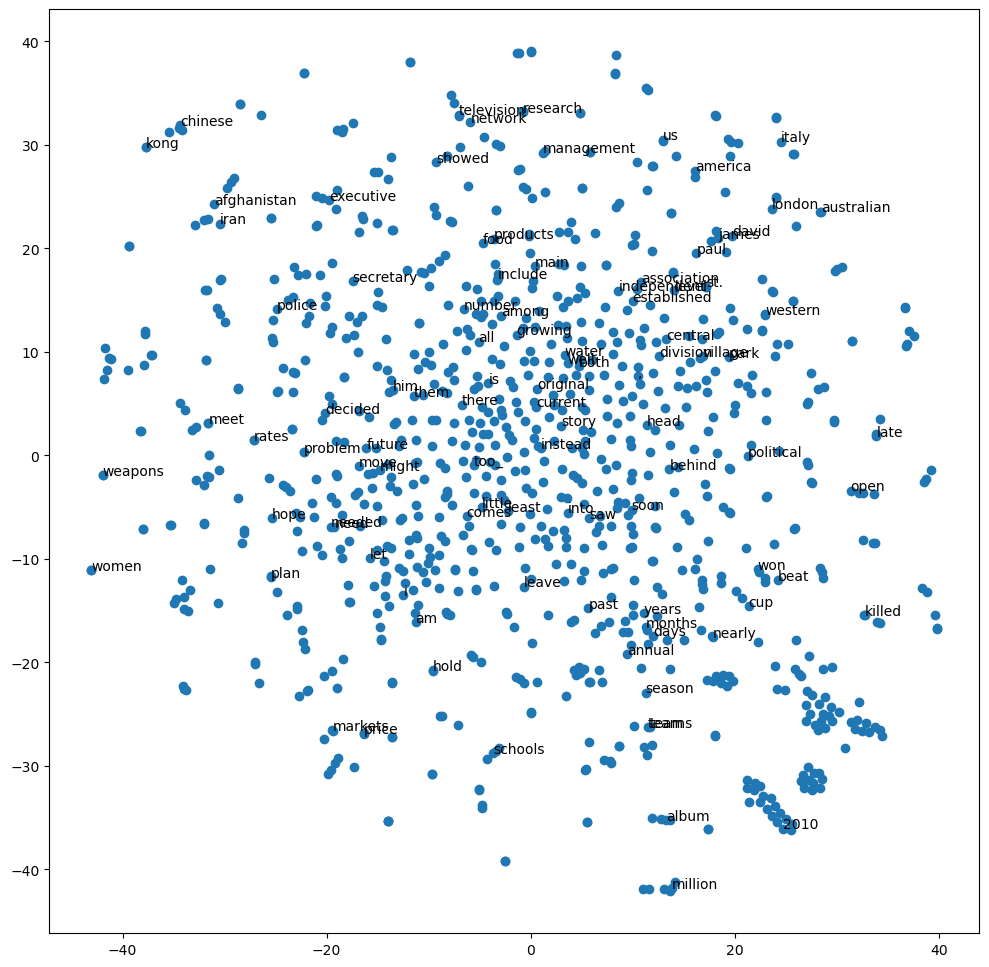

In [17]:
import matplotlib.pyplot as plt
import random

def reduce_dimensions(wv, n):
    num_dimensions = 2  # final num dimensions (2D, 3D, etc)

    # extract the words & their vectors, as numpy arrays
    vectors = np.asarray(wv.vectors[:n])
    labels = np.asarray(wv.index_to_key[:n]) 

    # reduce using t-SNE
    tsne = TSNE(n_components=num_dimensions, learning_rate='auto', init='random')
    vectors = tsne.fit_transform(vectors)

    x_vals = [v[0] for v in vectors]
    y_vals = [v[1] for v in vectors]
    return x_vals, y_vals, labels

def plot_with_matplotlib(x_vals, y_vals, labels):
    plt.figure(figsize=(12, 12))
    plt.scatter(x_vals, y_vals)

    # Label randomly subsampled 100 data points
    random.seed(0)
    indices = list(range(len(labels)))
    selected_indices = random.sample(indices, 100)
    for i in selected_indices:
        plt.annotate(labels[i], (x_vals[i], y_vals[i]))

x_vals, y_vals, labels = reduce_dimensions(wv, 1000)
plot_with_matplotlib(x_vals, y_vals, labels)

[Q7] Implémenter la visualisation grâce à la méthode [MDS](https://andrewirwin.github.io/data-visualization/mds.html), puis avec la méthode [PCA](https://andrewirwin.github.io/data-visualization/pca.html). Quelles sont vos remarques entre les trois visualisations?

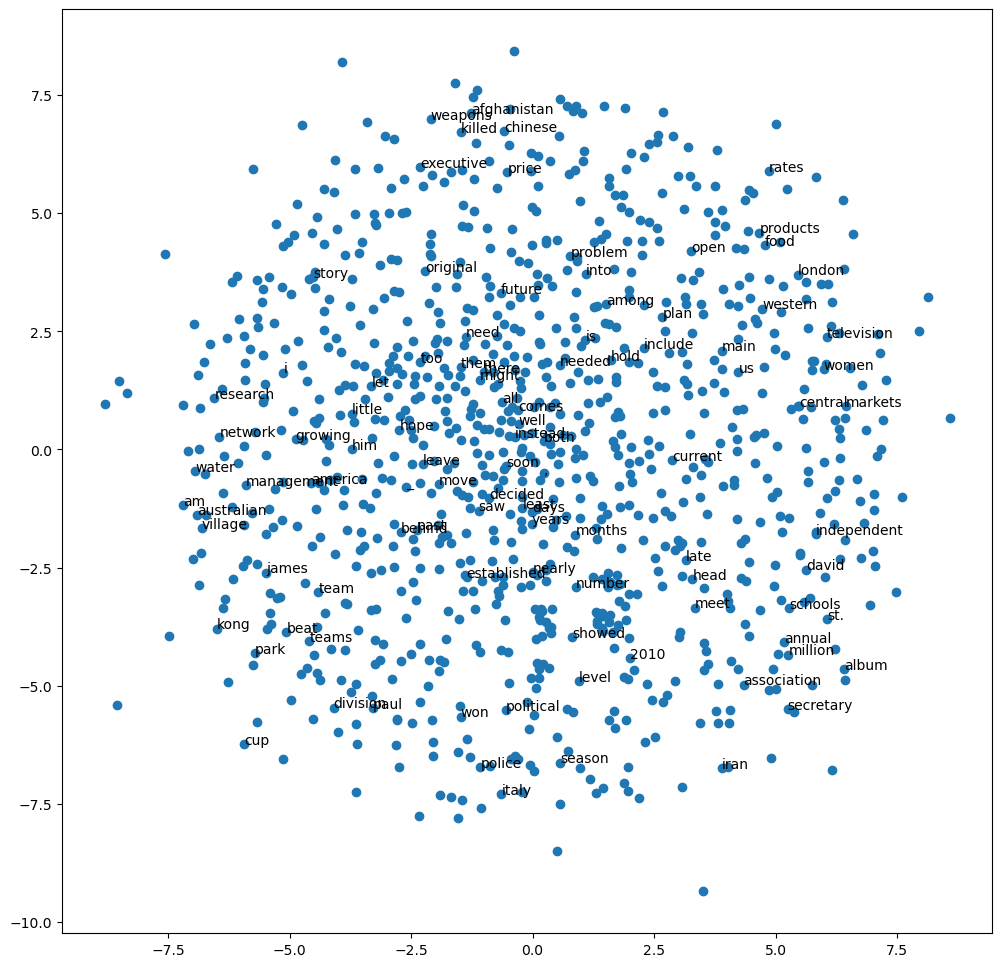

In [20]:
# insérer votre code ici - MDS

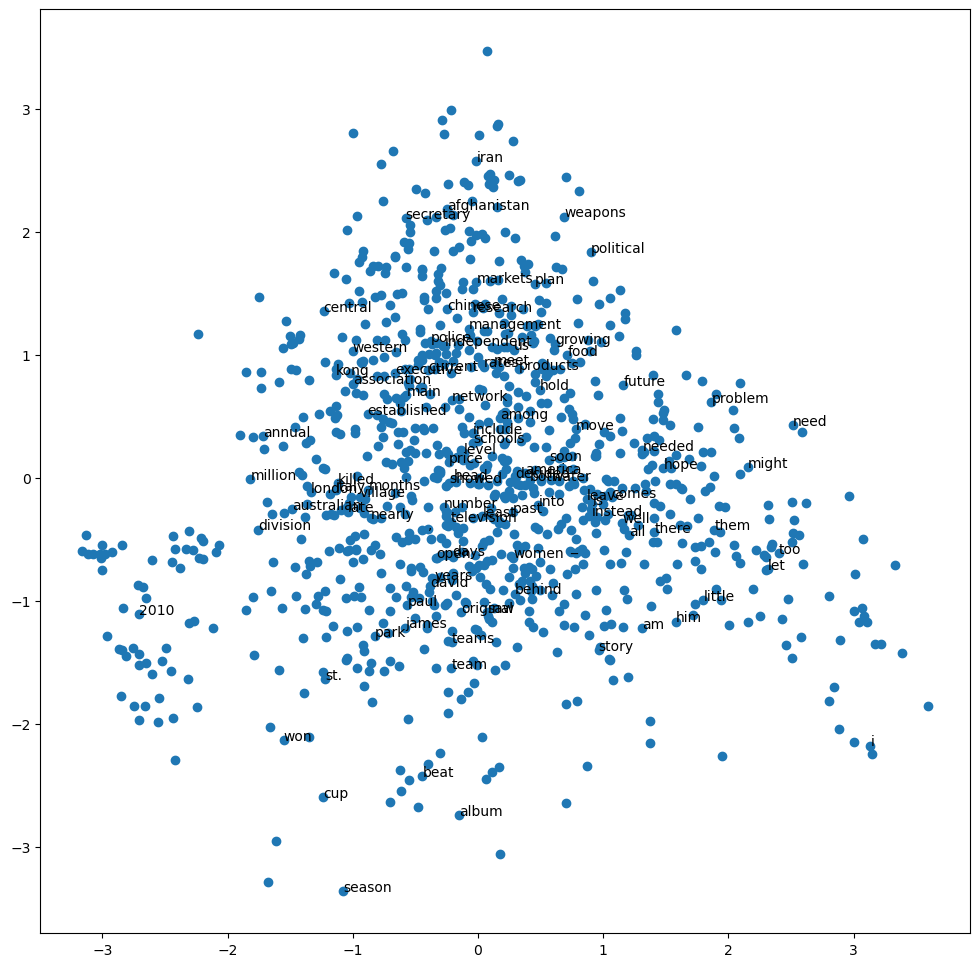

In [21]:
# insérer votre code ici - PCA

4 - PROJET : Réécrire un texte à partir de tranformations basées sur les plongements lexicaux 
------

[Projet Q1] Réécrire un texte donné en anglais de sorte à ce que chaque substantif du texte soit remplacé par le Kème mot le plus proche dans le plongement lexical. Vous générerez le nuage de mots correspondant à partir du texte réécrit.

In [38]:
# insérer votre code ici
#!python -m spacy download en_core_web_lg

racial Gender
stereotypes stereotype
theories theory
suggests
that
women men
are
generally
perceived
as
more
masculine
than
men women
,
whereas
men women
are
generally
perceived
as
more
feminine
than
women men
.
Several
dorsal scales
have
been
developed
to
measure
fundamental
aspect aspects
of
racial gender
stereotype stereotypes
(
e.g.
,
agencies agency
and
anglican communion
,
competency competence
and
warm warmth
,
or
nzaid instrumentality
and
expressiveness expressivity
)
.
Although
omitted
in
later
versions version
,
senhor Bem
's
original
sexual Sex
roles Role
inventories Inventory
included
the
item items
“
masculine
”
and
“
feminine
”
in
include addition
to
more
specific
racial gender
-
stereotypical
attribute attributes
.
We
argue
that
it
is
useful
to
be
able
to
measure
these
two
focus core
concept concepts
in
a
reliable
,
valid
,
and
parsimonious
what way
.
We
introduce
a
new
and
brief
magnitude scale
,
the
tradition Traditional
femininity Masculinity
-
masculinity Femininity


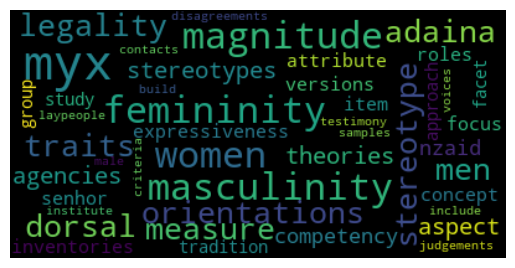

In [39]:
# insérer votre code ici

[Projet Q2] Réécrire un texte donné en anglais en le genrifiant. Ainsi, chaque substantif et adjectif du texte devra être remplacé par le premier mot le plus proche dans le plongement lexical suivant la direction de genrification féminine. Il suffira alors d'utiliser les opérations d'analogie. Vous générerez le nuage de mots correspondant à partir du texte réécrit.

In [41]:
# insérer votre code ici

Gender
stereotypes stereotype
theories theory
suggests
that
women men
are
generally
perceived
as
more
feminine masculine
than
woman women
,
whereas
woman women
are
generally
perceived
as
more
masculine feminine
than
women men
.
Several
dorsal scales
have
been
developed
to
measure
basic fundamental
aspect aspects
of
women gender
stereotype stereotypes
(
e.g.
,
agencies agency
and
eucharist communion
,
competency competence
and
affection warmth
,
or
nymphomania instrumentality
and
expressiveness expressivity
)
.
Although
omitted
in
her later
versions version
,
Bem
's
version original
Sex
Role
Inventory
included
the
item items
“
feminine masculine
”
and
“
masculine feminine
”
in
include addition
to
more
particular specific
women gender
-
stereotype stereotypical
attribute attributes
.
We
argue
that
it
is
helpful useful
to
be
can able
to
measure
these
two
component core
concept concepts
in
a
dependable reliable
,
invalid valid
,
and
ladylike parsimonious
her way
.
We
introduce
a
york new
a

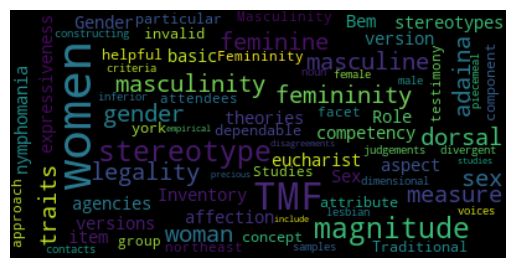

In [33]:
# insérer votre code ici

5 - PROJET : Redéfinir l'algorithme Lesk
------

[Projet Q3] L'algorithme de Lesk (https://en.wikipedia.org/wiki/Lesk_algorithm) permet de désambiguiser le sens d'un mot dans un contexte défini. Ainsi il retourne le sens correspondant à un mot dans un contexte donné. La fonction OVERLAP implémentée dans l'algorithme Lesk permet de choisir le meilleur sens en fonction du cardinal de l'intersection des mots entre la définition du sens et le contexte textuel. 

Ici, vous proposerez de faire cette sélection à partir d'une représentation sémantique continue des phrases. Chaque phrase devra être donc représentée par un vecteur sémantique. Vous pourrez utiliser le vecteur moyen de tous les mots dans une phrase (average pooling) ou des techniques plus abouties comme celle proposé par [(Hovy, 2025)](https://aclanthology.org/P15-1073.pdf). Le sens d'un mot dans son contexte sera donc celui qui maximise la similarité entre la représentation sémantique de la définition et celle du contexte.

In [45]:
# insérer votre code ici

gender Gender
stereotype stereotype
theory theory
propose suggests
man men
by_and_large generally
perceive perceived
masculine masculine
woman women
woman women
by_and_large generally
perceive perceived
feminine feminine
man men
scale scales
develop developed
measure measure
fundamental fundamental
aspect aspects
gender gender
stereotype stereotypes
agency agency
communion communion
competence competence
heat warmth
instrumentality instrumentality
expressivity expressivity
exclude omitted
later later
version version
Bem Bem
master original
sexual_activity Sex
function Role
inventory Inventory
include included
item items
masculine masculine
feminine feminine
addition addition
particular specific
gender gender
stereotyped stereotypical
property attributes
argue argue
useful useful
able able
measure measure
core core
concept concepts
reliable reliable
valid valid
parsimonious parsimonious
manner way
introduce introduce
new new
brief brief
scale scale
traditional Traditional
maleness Mascu

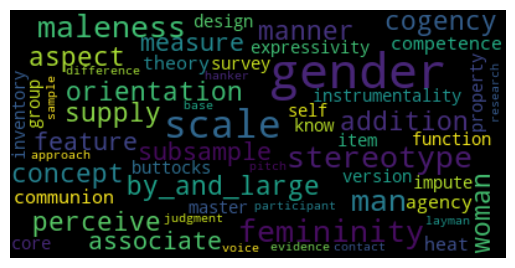

In [46]:
# insérer votre code ici

6 - PROJET MAISON  (A RENDRE UNE SEMAINE AVANT L'EXAMEN TERMINAL)
------

Vous devrez proposer une méthode originale de réécriture créative de texte dans la veine d\'OULIPO qui combine à la fois la ressource lexicale wordnet et les plongements lexicaux. Vous pourrez vous inspirer des nombreuses propostions [OULIPO](https://www.oulipo.net/). Vous pourrez bien entendu inclure tous les concepts abordés pendant les cours théoriques, comme par exemple les entités nommées et les unités polylexicales. Une mention spéciale vous sera accordée si vous travailer sur le Français ou toute autre langue que l'anglais. Dans ce cas, vous aurez besopin d'un moteur de traduction pour accéder aux définitions de wordnet. Vous trouverez des traducteurs [ICI](https://pypi.org/project/translators/). Pour les plongements lexicaux, vous aurez accès aux plongements multilingues de Fasttext [ICI](https://fasttext.cc/docs/en/crawl-vectors.html). 

Bon courage et bonne créativité ;)

In [ ]:
# insérer votre code ici